In [1]:
import pandas as pd
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn import pipeline
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
# Load the dataset
#Stationær
df = pd.read_csv(r'C:\Users\Daniel K\OneDrive\Desktop\DAKI\1. Semester\P1_eksamenskode\entire_dataset_updated.csv')
#Bærbar
#df = pd.read_csv("/Users/daniel_kristensen/DAKI/opgaver/DAKI-opg/daki_p1/Rensetdata.csv")


# Define features and target variable
features = ['Cholesterol', 'RestingBP', 'Age', 'FastingBS', 'MaxHR', 'Sex_M', 
            'ExerciseAngina_Y', 'RestingECG_ST', 'ChestPainType_TA', 
            'ChestPainType_ATA', 'ChestPainType_NAP', 'RestingECG_Normal']
target = 'HeartDisease'

X = df[features]
y = df[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)


# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

In [55]:
#Logistisk regression grid search
from sklearn.model_selection import GridSearchCV, train_test_split
model = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'random_state': [13]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                            scoring=scoring, refit="f1", cv=20, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best F1 Score: {grid_search.best_score_}")

Fitting 20 folds for each of 24 candidates, totalling 480 fits
Best Parameters: {'C': 1, 'penalty': 'l1', 'random_state': 13, 'solver': 'liblinear'}
Best F1 Score: 0.8221770666111203


In [ ]:
#SVM grid search
from sklearn.model_selection import GridSearchCV, train_test_split

model = SVC(probability=True, kernel="rbf")

param_grid = {
    'C': [0.1, 1, 10, 100],             # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],    # Kernel coefficient for 'rbf'
    'random_state': [13]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring=scoring, refit="f1", cv=20, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best F1 Score: {grid_search.best_score_}")

Fitting 20 folds for each of 16 candidates, totalling 320 fits
Best Parameters: {'C': 0.1, 'gamma': 0.001, 'random_state': 13}
Best F1 Score: 0.7353854502523682


In [60]:
#Random forest grid search

model = RandomForestClassifier()

param_grid = {
    'max_depth': [10, 20, 30, None],  # None means nodes are expanded until all leaves are pure or contain min_samples_leaf
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider for split
    'min_samples_leaf': [1, 2, 4, 6],  # Minimum samples required to be a leaf node
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'n_estimators': [100, 200, 500],  # Number of trees in the forest
    'random_state': [13],  # Random state for reproducibility (fixed)
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='f1', cv=20, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best F1 Score: {grid_search.best_score_}")

Fitting 20 folds for each of 432 candidates, totalling 8640 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 13}
Best F1 Score: 0.8341445418744879


In [74]:
log_reg =  Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear', C=1, penalty="l1", random_state=13))])

svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, kernel="rbf", C=0.1, gamma=00.1,  random_state=13))
])

rf = RandomForestClassifier(
max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state= 13
)

In [75]:
#Log_reg results with CV
cv_results = cross_validate(log_reg, X_train, y_train, cv=20, scoring=scoring)

print("Mean cross-validation accuracy:", cv_results['test_accuracy'].mean())
print("Mean cross-validation precision:", cv_results['test_precision'].mean())
print("Mean cross-validation recall:", cv_results['test_recall'].mean())
print("Mean cross-validation F1 score:", cv_results['test_f1'].mean())

Mean cross-validation accuracy: 0.800515873015873
Mean cross-validation precision: 0.8160984038751067
Mean cross-validation recall: 0.8275
Mean cross-validation F1 score: 0.8195775707136426


In [76]:
#SVM results with Cv

cv_svm = cross_validate(svm, X_train, y_train, cv=20, scoring=scoring)

print("Mean cross-validation accuracy:", cv_svm['test_accuracy'].mean())
print("Mean cross-validation precision:", cv_svm['test_precision'].mean())
print("Mean cross-validation recall:", cv_svm['test_recall'].mean())
print("Mean cross-validation F1 score:", cv_svm['test_f1'].mean())

Mean cross-validation accuracy: 0.7921825396825397
Mean cross-validation precision: 0.7999627795608918
Mean cross-validation recall: 0.8326315789473686
Mean cross-validation F1 score: 0.8138918104994918


In [77]:
#random forest results with CV
cv_rf = cross_validate(rf, X_train, y_train, cv=20, scoring=scoring)

print("Mean cross-validation accuracy:", cv_rf['test_accuracy'].mean())
print("Mean cross-validation precision:", cv_rf['test_precision'].mean())
print("Mean cross-validation recall:", cv_rf['test_recall'].mean())
print("Mean cross-validation F1 score:", cv_rf['test_f1'].mean())

Mean cross-validation accuracy: 0.8158730158730159
Mean cross-validation precision: 0.8264917687829587
Mean cross-validation recall: 0.845657894736842
Mean cross-validation F1 score: 0.8341445418744879


In [78]:

# Create voting classifier
voting_model = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('svm', svm),
        ('rf', rf)
    ],
    voting='soft'  
)

cv_results = cross_validate(voting_model, X_train, y_train, cv=20, scoring=scoring)

#Reaults
print("Stack:")
print("Mean cross-validation accuracy:", cv_results['test_accuracy'].mean())
print("Mean cross-validation precision:", cv_results['test_precision'].mean())
print("Mean cross-validation recall:", cv_results['test_recall'].mean())
print("Mean cross-validation F1 score:", cv_results['test_f1'].mean())

Stack:
Mean cross-validation accuracy: 0.7949603174603173
Mean cross-validation precision: 0.8114013867109842
Mean cross-validation recall: 0.8226315789473684
Mean cross-validation F1 score: 0.8143931495632394


In [ ]:


param_grid = {
    # Logistic Regression parameters
    'log_reg__classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'log_reg__classifier__penalty': ['l1', 'l2'],
    'log_reg__classifier__solver': ['liblinear'],  # Solver compatibility check

    # SVM parameters
    'svm__classifier__C': [0.1, 1, 10],
    'svm__classifier__gamma': [1, 0.1, 0.01],

    # Random Forest parameters
    'rf__max_depth': [10, 20, 30, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__n_estimators': [100, 200],
}


voting_pipeline = Pipeline([
    ('ensemble', voting_model)  # The VotingClassifier defined earlier
])

grid_search = GridSearchCV(
    estimator=voting_model,  # Replace with your VotingClassifier
    param_grid=param_grid,
    scoring='f1',
    cv=20,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best F1 Score: {grid_search.best_score_}")

#Fitting 20 folds for each of 7776 candidates, totalling 155520 fits
#Best Parameters: {'log_reg__classifier__C': 10, 'log_reg__classifier__penalty': 'l1', 'log_reg__classifier__solver': 'liblinear', 'rf__max_depth': 20, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 100, 'svm__classifier__C': 1, 'svm__classifier__gamma': 0.01}
#Best F1 Score: 0.8288376552786053

Fitting 20 folds for each of 7776 candidates, totalling 155520 fits
Best Parameters: {'log_reg__classifier__C': 10, 'log_reg__classifier__penalty': 'l1', 'log_reg__classifier__solver': 'liblinear', 'rf__max_depth': 20, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 100, 'svm__classifier__C': 1, 'svm__classifier__gamma': 0.01}
Best F1 Score: 0.8288376552786053


: 

In [66]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Custom threshold value
threshold = 0.376

def evaluate_threshold(voting_model, X_train, y_train, X_test, y_test, threshold):
    voting_model.fit(X_train, y_train)

    y_pred_proba = voting_model.predict_proba(X_test)[:, 1]

    y_pred_custom = (y_pred_proba >= threshold).astype(int)

    precision = precision_score(y_test, y_pred_custom)
    recall = recall_score(y_test, y_pred_custom)
    f1 = f1_score(y_test, y_pred_custom)
    accuracy = accuracy_score(y_test, y_pred_custom)

    return y_pred_custom, precision, recall, f1, accuracy

# Custom threshold
y_pred_custom, precision, recall, f1, accuracy = evaluate_threshold(
    voting_model, X_train, y_train, X_test, y_test, threshold
)

# Print results
print(f"Custom Threshold Metrics at Threshold {threshold}:")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Custom Threshold Metrics at Threshold 0.376:
F1 Score: 0.8430493273542601
Accuracy: 0.8055555555555556
Precision: 0.7580645161290323
Recall: 0.9494949494949495


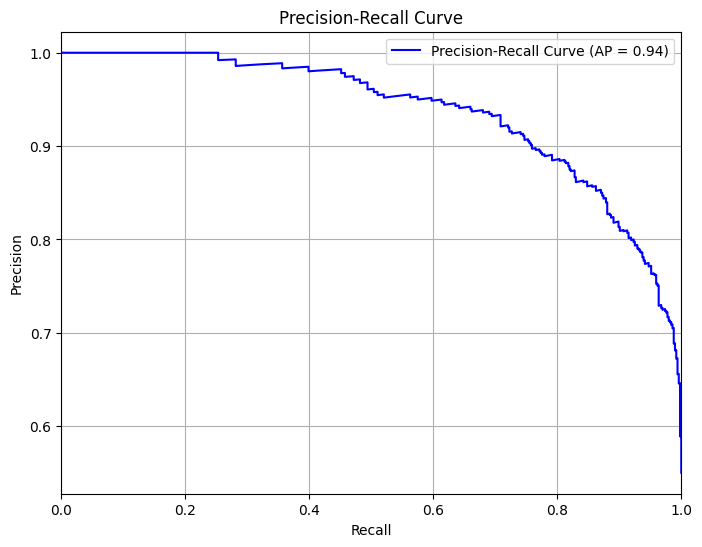

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_predict



voting_model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_proba_positive = voting_model.predict_proba(X)[:, 1]


# Compute precision-recall metrics
precision, recall, thresholds = precision_recall_curve(y, y_proba_positive)
avg_precision = average_precision_score(y, y_proba_positive)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {avg_precision:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.show()